<a href="https://colab.research.google.com/github/JayedTamim/Thesis_Model_NN/blob/main/predict_covid_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
%matplotlib inline

In [226]:
df = pd.read_csv('qt_dataset_new.csv',encoding='latin1')

In [227]:
df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


In [228]:
df.shape

(10000, 5)

In [229]:
df.set_index('ID',inplace=True)

In [230]:
df.tail()

,Oxygen,PulseRate,Temperature,Result
ID,,,,
9995,95,124,97,Negative
9996,88,70,100,Positive
9997,99,56,105,Negative
9998,92,49,98,Positive
9999,85,52,99,Positive


In [231]:
df.isna().sum()

Oxygen         0
PulseRate      0
Temperature    0
Result         0
dtype: int64

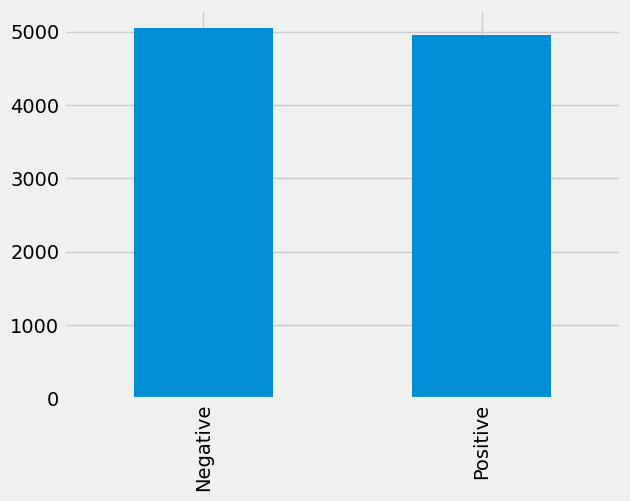

In [232]:
plt.style.use('fivethirtyeight')
df['Result'].value_counts().plot(kind='bar')
plt.show()

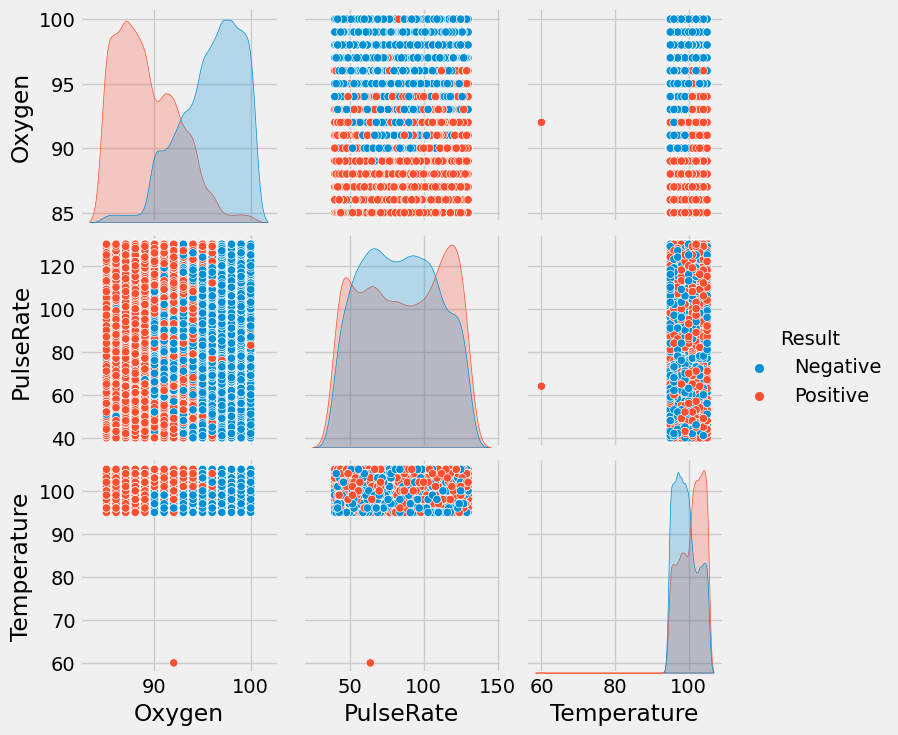

In [233]:
plt.style.use('fivethirtyeight')
sns.pairplot(data=df,hue='Result')
plt.show()

In [234]:
df['Result'].replace(['Positive','Negative'],[1,0],inplace=True)

In [235]:
df['Result'].unique()

array([0, 1])

In [236]:
x = df.drop('Result',axis=1)
y = df['Result']

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [238]:
x_train.shape

(7000, 3)

In [239]:
x_test.shape

(3000, 3)

In [240]:
y_train.shape

(7000,)

In [241]:
y_test.shape

(3000,)

In [242]:
import pandas as pd

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Extract features (x) and labels (y)
x = df[['oxygen', 'pulserate', 'temperature']].values
y = df['result'].values

# Preprocess the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)


x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))






In [243]:
evaluation = model.evaluate(x_test, y_test)

print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")


63/63 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9340
Loss: 0.23340225219726562, Accuracy: 0.9340000152587891


In [244]:
# Evaluate the model on the test set
evaluation = model.evaluate(x_test, y_test)

accuracy = evaluation[1]
print(f"Accuracy on the test set: {accuracy}")


63/63 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.9340
Accuracy on the test set: 0.9340000152587891


In [245]:

# Train the LSTM model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Get training accuracy from history
training_accuracy = history.history['accuracy'][-1]

print(f"Training Accuracy: {training_accuracy}")


Epoch 1/10
250/250 [==============================] - 1s 6ms/step - loss: 0.2226 - accuracy: 0.9334 - val_loss: 0.2332 - val_accuracy: 0.9335
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9335 - val_loss: 0.2338 - val_accuracy: 0.9335
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9335 - val_loss: 0.2320 - val_accuracy: 0.9340
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2213 - accuracy: 0.9345 - val_loss: 0.2311 - val_accuracy: 0.9350
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9342 - val_loss: 0.2317 - val_accuracy: 0.9345
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2203 - accuracy: 0.9340 - val_loss: 0.2291 - val_accuracy: 0.9350
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2199 - accuracy: 0.9342 - val_loss: 0.2286 - val_accuracy: 0.9350
Epoch 

In [246]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [247]:
y_pred_train = model.predict(x_train)

250/250 [==============================] - 0s 2ms/step


In [248]:
import numpy as np
from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred_labels = np.where(y_pred > threshold, 1, 0)

# Now compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)


[[937  78]
 [ 55 930]]


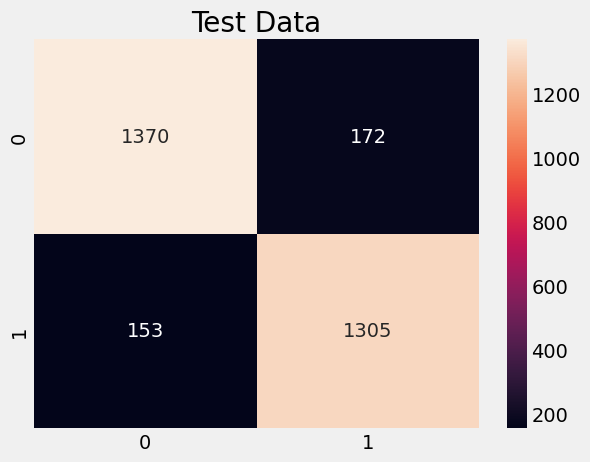

In [249]:
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

In [250]:
import numpy as np
from sklearn.metrics import confusion_matrix

threshold = 0.5
y_pred_train_labels = np.where(y_pred_train > threshold, 1, 0)

# Now compute the confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train_labels)
print(conf_matrix_train)


[[3744  283]
 [ 238 3735]]


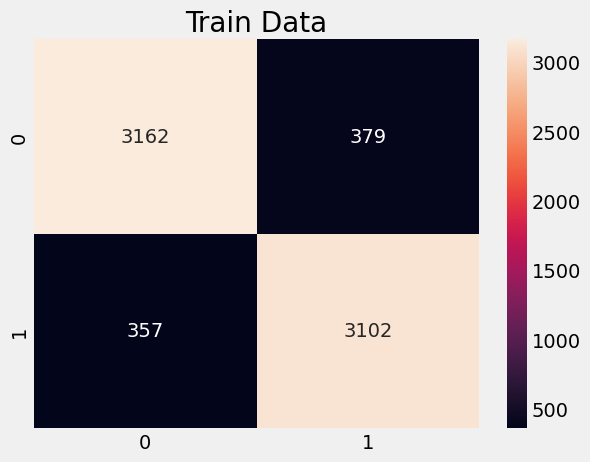

In [251]:
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()